In [106]:
import pandas as pd
import numpy as np

df = pd.read_csv('temp_df_final.csv', index_col = 0).iloc[:, 1:]

df2 = pd.read_csv('섹터ETF취합/Add_TI_섹터ETF/TIGER200_커뮤니케이션서비스_TI.csv', index_col = 0)

df2

,날짜,종가,diff_5,diff_20,ma_5,ma_20
1119,2019-09-05,16325.0,0.004615,0.035850,16435.0,16142.50
1118,2019-09-06,16385.0,0.006759,0.032777,16457.0,16168.50
1117,2019-09-09,16530.0,0.001515,0.026708,16462.0,16190.00
1116,2019-09-10,16530.0,-0.001510,0.037665,16457.0,16220.00
1115,2019-09-11,16540.0,0.001514,0.044522,16462.0,16255.25
...,...,...,...,...,...,...
4,2024-03-15,17780.0,0.003953,-0.049706,17959.0,18145.50
3,2024-03-18,17760.0,-0.010033,-0.051029,17923.0,18097.75
2,2024-03-19,17570.0,-0.024972,-0.067905,17833.0,18033.75
1,2024-03-20,17595.0,-0.023856,-0.064842,17747.0,17972.75


### 날짜 형식 통일

In [107]:
# Converting 'stateDt' to datetime format
df['stateDt'] = pd.to_datetime(df['stateDt'], format='%Y%m%d')


# Renaming the 'stateDt' column to 'Date'
df.rename(columns={'stateDt': 'Date'}, inplace=True)


df.tail()  # Display the last few rows to check the changes


,Date,decideCnt,deathCnt
1106,2023-04-15,30978954.0,34368.0
1107,2023-04-17,30994088.0,34376.0
1108,2023-04-18,31009261.0,34386.0
1109,2023-04-19,31025769.0,34392.0
1110,2023-04-20,31039863.0,34401.0


In [108]:
# '날짜'와 '종가' 컬럼 이름 변경
df2.rename(columns={'날짜': 'Date', '종가': 'Close'}, inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')
df2['diff_1'] = df2['Close'].pct_change()

df2.head()  # 변경된 데이터프레임의 마지막 몇 행을 확인합니다.


,Date,Close,diff_5,diff_20,ma_5,ma_20,diff_1
1119,2019-09-05,16325.0,0.004615,0.035850,16435.0,16142.50,NaN
1118,2019-09-06,16385.0,0.006759,0.032777,16457.0,16168.50,0.003675
1117,2019-09-09,16530.0,0.001515,0.026708,16462.0,16190.00,0.008850
1116,2019-09-10,16530.0,-0.001510,0.037665,16457.0,16220.00,0.000000
1115,2019-09-11,16540.0,0.001514,0.044522,16462.0,16255.25,0.000605


### 외생변수 데이터 5일 차분으로 변환

In [109]:
# df에서 decideCnt와 deathCnt의 차이를 계산하고, 이를 %로 변환
df['decideCnt_diff'] = df['decideCnt'].diff().fillna(0)
df['deathCnt_diff'] = df['deathCnt'].diff().fillna(0)
df['decideCnt_diff_perc'] = df['decideCnt_diff'] / df['decideCnt'].shift(5)
df['deathCnt_diff_perc'] = df['deathCnt_diff'] / df['deathCnt'].shift(5)
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # 무한대 값을 NaN으로 대체

# df2와 df를 'Date' 기준으로 합치기
df_combined = pd.merge(df2, df[['Date', 'decideCnt_diff_perc', 'deathCnt_diff_perc']], on='Date', how='outer')

# NaN이 포함된 행 제거
df_combined.dropna(inplace=True)

df_combined.tail()

,Date,Close,diff_5,diff_20,ma_5,ma_20,diff_1,decideCnt_diff_perc,deathCnt_diff_perc
891,2023-04-14,19070.0,0.038106,0.067749,18685.0,18384.25,0.013822,0.000377,0.000146
892,2023-04-17,18950.0,0.031573,0.048990,18801.0,18428.50,-0.006293,0.000489,0.000233
893,2023-04-18,18775.0,0.008324,0.030461,18832.0,18456.25,-0.009235,0.000490,0.000291
894,2023-04-19,18680.0,0.006737,0.002146,18857.0,18458.25,-0.005060,0.000533,0.000175
895,2023-04-20,18575.0,-0.012493,0.010884,18810.0,18468.25,-0.005621,0.000455,0.000262


In [110]:
df_combined

,Date,Close,diff_5,diff_20,ma_5,ma_20,diff_1,decideCnt_diff_perc,deathCnt_diff_perc
116,2020-02-27,17980.0,-0.040043,-0.003326,18330.0,18336.00,-0.019094,1.166282,0.500000
117,2020-02-28,17555.0,-0.058713,-0.016802,18111.0,18321.00,-0.023637,0.948505,0.000000
118,2020-03-02,17475.0,-0.041415,-0.016878,17960.0,18306.00,-0.004557,0.377478,0.333333
119,2020-03-03,17635.0,-0.044691,-0.020006,17795.0,18288.00,0.009156,0.339751,0.461538
120,2020-03-04,18355.0,0.001364,0.018873,17800.0,18305.00,0.040828,0.220796,0.307692
...,...,...,...,...,...,...,...,...,...
891,2023-04-14,19070.0,0.038106,0.067749,18685.0,18384.25,0.013822,0.000377,0.000146
892,2023-04-17,18950.0,0.031573,0.048990,18801.0,18428.50,-0.006293,0.000489,0.000233
893,2023-04-18,18775.0,0.008324,0.030461,18832.0,18456.25,-0.009235,0.000490,0.000291
894,2023-04-19,18680.0,0.006737,0.002146,18857.0,18458.25,-0.005060,0.000533,0.000175


### optimal lag를 찾는 함수 작성

In [111]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
from tqdm import tqdm 

# 예제 데이터 (Assuming df_combined is already defined)
# df_combined = pd.DataFrame({...}) 

windows = [len(df_combined)]
max_lags = {len(df_combined): 120}

def optimal_lag(df_combined, window, max_lag):
    p_values_dict = {}  # 각 윈도우의 p-value를 저장할 딕셔너리

    # tqdm is used here to show progress
    for start in tqdm(range(len(df_combined) - window + 1), desc=f'Processing Window {window}'):
        sub_df_combined = df_combined.iloc[start:start + window]
        best_p_value = float('inf')
        best_lag = 0
        p_values = []  # 각 윈도우에 대한 p-value 리스트
        
        for lag in range(1, max_lag + 1):
            result = grangercausalitytests(sub_df_combined[['diff_5', 'deathCnt_diff_perc']], maxlag=lag, verbose=False)
            p_value = result[lag][0]['ssr_ftest'][1]
            p_values.append(p_value)  # p-value 저장

            print(f"Lag {lag}: p-value = {p_value:.6f}")
            
            if p_value < best_p_value:
                best_p_value = p_value
                best_lag = lag
        
        # if best_p_value > 0.05:
        #     best_lag = 0
        
        p_values_dict[start] = p_values  # 해당 윈도우의 p-value 리스트 저장

        print(f"Best lag for this window: {best_lag} with p-value = {best_p_value:.6f}\n")
    
    return p_values_dict



### 출력 및 결과 시각화

Processing Window 753:   0%|          | 0/1 [00:00<?, ?it/s]

Lag 1: p-value = 0.901948
Lag 2: p-value = 0.702979
Lag 3: p-value = 0.177768
Lag 4: p-value = 0.049786
Lag 5: p-value = 0.043810
Lag 6: p-value = 0.173854
Lag 7: p-value = 0.009904
Lag 8: p-value = 0.005385
Lag 9: p-value = 0.000248
Lag 10: p-value = 0.000419
Lag 11: p-value = 0.000043
Lag 12: p-value = 0.000005
Lag 13: p-value = 0.000014
Lag 14: p-value = 0.000000
Lag 15: p-value = 0.000000
Lag 16: p-value = 0.000080
Lag 17: p-value = 0.000343
Lag 18: p-value = 0.000273
Lag 19: p-value = 0.003132
Lag 20: p-value = 0.009228
Lag 21: p-value = 0.087196
Lag 22: p-value = 0.136539
Lag 23: p-value = 0.412917
Lag 24: p-value = 0.379607
Lag 25: p-value = 0.299208
Lag 26: p-value = 0.279882
Lag 27: p-value = 0.273481
Lag 28: p-value = 0.736764
Lag 29: p-value = 0.761447
Lag 30: p-value = 0.750256
Lag 31: p-value = 0.747054
Lag 32: p-value = 0.702411
Lag 33: p-value = 0.705438
Lag 34: p-value = 0.768664
Lag 35: p-value = 0.655959
Lag 36: p-value = 0.657261
Lag 37: p-value = 0.660634
Lag 38: p-

Processing Window 753: 100%|██████████| 1/1 [00:57<00:00, 57.16s/it]

Lag 120: p-value = 0.529943
Best lag for this window: 14 with p-value = 0.000000



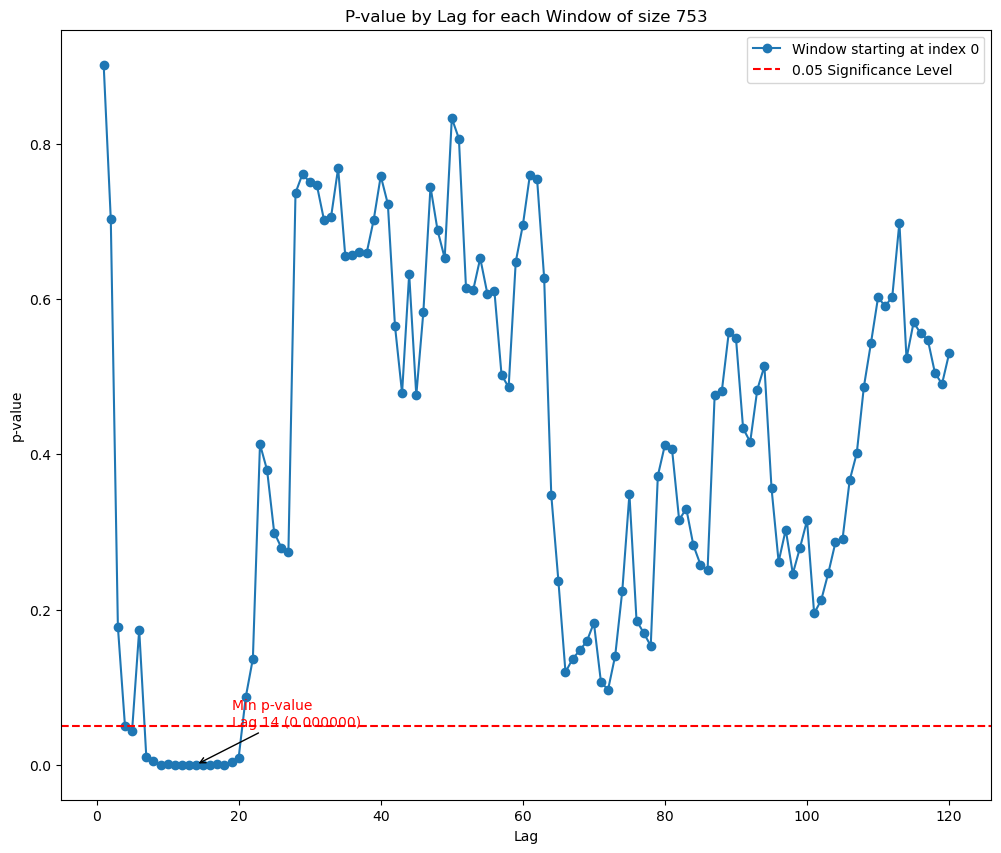

In [112]:
# Loop over the windows and compute the p-values for each
for window in windows:
    max_lag = max_lags[window]
    p_values_dict = optimal_lag(df_combined, window, max_lag)

    # 시각화
    plt.figure(figsize=(12, 10))
    
    for start, p_values in p_values_dict.items():
        plt.plot(range(1, max_lag + 1), p_values, marker='o', label=f'Window starting at index {start}')
        
        # p-value가 최소가 되는 지점 찾기
        min_p_value = min(p_values)
        min_lag = p_values.index(min_p_value) + 1
        
        # 그래프에 표시
        plt.annotate(f'Min p-value\nLag {min_lag} ({min_p_value:.6f})',
                     xy=(min_lag, min_p_value), xytext=(min_lag + 5, min_p_value + 0.05),
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     fontsize=10, color='red')

    plt.xlabel('Lag')
    plt.ylabel('p-value')
    plt.title(f'P-value by Lag for each Window of size {window}')
    plt.axhline(y=0.05, color='r', linestyle='--', label='0.05 Significance Level')
    plt.legend(loc='best')
    plt.show()
